In [1]:
import numpy as np
from matplotlib import pyplot
from scipy import linalg
import copy
import iMPS
from scipy.sparse import linalg
import funcs

In [2]:
eigs1=[]
X = np.array([[0,1],[1,0]])
B = np.zeros([1,1,4])
B[0,0] =(np.random.rand(2,2)).reshape([4,])
#B[0,0] =(np.array([1,0,0,0])).reshape([4,])

print("initial MPS")
print(B)
h1 = 6
h2 = 0
trans = funcs.single_trans(h1=h1,h2=h2)

MPS = iMPS.iMPS()
MPS.construct_from_tensor_list([B])

        
MPO = iMPS.iMPO()
MPO.construct_from_tensor_list([trans])
MPS_power = iMPS.MPS_power_method(MPS,MPO,20)
MPS_power.update(0,200)
print("finial MPS")
print(MPS.B[0])

initial MPS
[[[0.53224105 0.63692801 0.13807297 0.79297795]]]
finial MPS
[[[6.14421235e-06-4.84142609e-23j 0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j 1.00000000e+00-7.87960019e-18j]]]


In [3]:
eigs1=[]
X = np.array([[0,1],[1,0]])
B = np.zeros([1,1,4])
B[0,0] =(np.random.rand(2,2)).reshape([4,])
#B[0,0] =(np.array([1,0,0,0])).reshape([4,])

print("initial MPS")
print(B)
h1 = 0
h2 = 6
trans = funcs.single_trans(h1=h1,h2=h2)

MPS = iMPS.iMPS()
MPS.construct_from_tensor_list([B])

        
MPO = iMPS.iMPO()
MPO.construct_from_tensor_list([trans])
MPS_power = iMPS.MPS_power_method(MPS,MPO,20)
MPS_power.update(0,200)
print("finial MPS")
print(MPS.B[0])

initial MPS
[[[0.21132267 0.82638938 0.80806216 0.93368752]]]
finial MPS
[[[0.5-1.66319219e-23j 0.5+5.76454948e-24j 0.5+5.76454948e-24j
   0.5-1.66319219e-23j]]]


$h_z \neq 0, h_x = 0$

In [4]:
eigs=[]
lam1s=[]
lam2s=[]
lam3s=[]
lam4s=[]
dims=[]
X = np.array([[0,1],[1,0]])
Z = np.array([[1,0],[0,-1]])
for h in np.arange(0.,1,0.01):   
    
    h1 = h
    h2 = 0
    
    B = np.zeros([1,1,4])
    B[0,0] =(linalg.expm(h*Z)).reshape([4,])
    #B[0,0] =(np.array([[0,0],[0,1]])).reshape([4,])
    #B[0,0] =(np.random.rand(2,2)).reshape([4,])
    MPS = iMPS.iMPS()
    MPS.construct_from_tensor_list([B])
    MPS.svd_threshold =1e-10
        

    trans = funcs.single_trans(h1=h1,h2=h2,u1="I",u2="I")
    
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans])
    MPS_power = iMPS.MPS_power_method(MPS,MPO,30)
    MPS_power.update(0,400)
    #print(MPS.chi[0])
    eigs.append(MPS_power.E_history[-1])


    
    T1 = funcs.single_T(h1,h2)
    MPO3 = iMPS.iMPO()
    MPO3.construct_from_tensor_list([T1])
    
    
    strap1 = iMPS.strap(MPS,MPO3,MPS)
    lam1= strap1.calculate_eig()
    
    T2 = funcs.single_T(h1,h2,"I","X")
    MPO4 = iMPS.iMPO()
    MPO4.construct_from_tensor_list([T2])
    
    
    strap2 = iMPS.strap(MPS,MPO4,MPS)
    lam2 = strap2.calculate_eig()
    
    
    T3 = funcs.single_T(h1,h2,"X","I")
    MPO4 = iMPS.iMPO()
    MPO4.construct_from_tensor_list([T3])
    
    
    strap3 = iMPS.strap(MPS,MPO4,MPS)
    lam3 = strap3.calculate_eig()
    
    T3 = funcs.single_T(h1,h2,"X","X")
    MPO4 = iMPS.iMPO()
    MPO4.construct_from_tensor_list([T3])
    
    
    strap4 = iMPS.strap(MPS,MPO4,MPS)
    lam4 = strap4.calculate_eig()
    
    dims.append(MPS.chi[0])
   
    lam1s.append(lam1)
    lam2s.append(lam2)
    lam3s.append(lam3)
    lam4s.append(lam4)

In [5]:
lam1s = np.real(lam1s)
lam2s = np.real(lam2s)
lam3s = np.real(lam3s)
lam4s = np.real(lam4s)

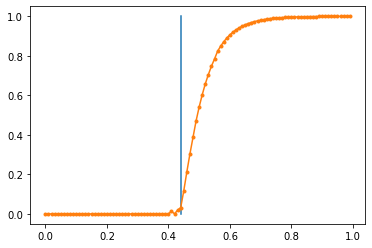

In [6]:
L=5
pyplot.plot([0.5*np.log(np.sqrt(2)+1)]*2,[0,1])
pyplot.plot(np.arange(0,1,0.01),(lam1s**L+lam2s**L-lam3s**L-lam4s**L)/(lam1s**L+lam2s**L+lam3s**L+lam4s**L),'.-')


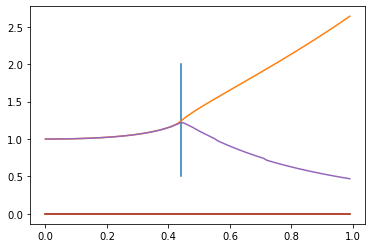

In [7]:
pyplot.plot([0.5*np.log(np.sqrt(2)+1)]*2,[0.5,2])
pyplot.plot(np.arange(0.,1,0.01),lam1s)
#pyplot.plot(np.arange(0.4,0.5,0.002),lam2s)
#pyplot.plot(np.arange(0.4,0.5,0.002),lam3s)
pyplot.plot(np.arange(0.,1,0.01),lam2s)
pyplot.plot(np.arange(0.,1,0.01),lam3s)
#pyplot.plot(np.arange(0.4,0.5,0.002),lam2s)
#pyplot.plot(np.arange(0.4,0.5,0.002),lam3s)
pyplot.plot(np.arange(0.,1,0.01),lam4s)

Text(0, 0.5, '$\\chi$')

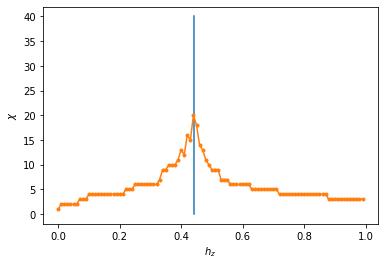

In [8]:
pyplot.plot([0.5*np.log(np.sqrt(2)+1)]*2,[0,40])
pyplot.plot(np.arange(0,1,0.01),dims,'.-')
pyplot.xlabel('$h_z$')
pyplot.ylabel('$\chi$')

$h_z = 0, h_x \neq 0$

In [9]:
eigs=[]
lam1s=[]
lam2s=[]
lam3s=[]
lam4s=[]
dims=[]
X = np.array([[0,1],[1,0]])
Z = np.array([[1,0],[0,-1]])
for h in np.arange(0.,1,0.01):   
    
    h1 = 0
    h2 = h
    
    B = np.zeros([1,1,4])
    B[0,0] =(linalg.expm(h*Z)).reshape([4,])
    #B[0,0] =(np.array([[0,0],[0,1]])).reshape([4,])
    #B[0,0] =(np.random.rand(2,2)).reshape([4,])
    MPS = iMPS.iMPS()
    MPS.construct_from_tensor_list([B])
    MPS.svd_threshold =1e-10
        

    trans = funcs.single_trans(h1=h1,h2=h2,u1="I",u2="I")
    
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans])
    MPS_power = iMPS.MPS_power_method(MPS,MPO,30)
    MPS_power.update(0,400)
    #print(MPS.chi[0])
    eigs.append(MPS_power.E_history[-1])


    
    T1 = funcs.single_T(h1,h2)
    MPO3 = iMPS.iMPO()
    MPO3.construct_from_tensor_list([T1])
    
    
    strap1 = iMPS.strap(MPS,MPO3,MPS)
    lam1= strap1.calculate_eig()
    
    T2 = funcs.single_T(h1,h2,"I","X")
    MPO4 = iMPS.iMPO()
    MPO4.construct_from_tensor_list([T2])
    
    
    strap2 = iMPS.strap(MPS,MPO4,MPS)
    lam2 = strap2.calculate_eig()
    
    
    T3 = funcs.single_T(h1,h2,"X","I")
    MPO4 = iMPS.iMPO()
    MPO4.construct_from_tensor_list([T3])
    
    
    strap3 = iMPS.strap(MPS,MPO4,MPS)
    lam3 = strap3.calculate_eig()
    
    T3 = funcs.single_T(h1,h2,"X","X")
    MPO4 = iMPS.iMPO()
    MPO4.construct_from_tensor_list([T3])
    
    
    strap4 = iMPS.strap(MPS,MPO4,MPS)
    lam4 = strap4.calculate_eig()
    
    dims.append(MPS.chi[0])
   
    lam1s.append(lam1)
    lam2s.append(lam2)
    lam3s.append(lam3)
    lam4s.append(lam4)
    
lam1s = np.real(lam1s)
lam2s = np.real(lam2s)
lam3s = np.real(lam3s)
lam4s = np.real(lam4s)

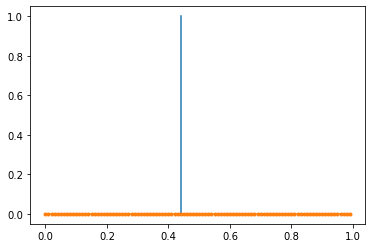

In [10]:
L=5
pyplot.plot([0.5*np.log(np.sqrt(2)+1)]*2,[0,1])
pyplot.plot(np.arange(0,1,0.01),(lam1s**L+lam2s**L-lam3s**L-lam4s**L)/(lam1s**L+lam2s**L+lam3s**L+lam4s**L),'.-')


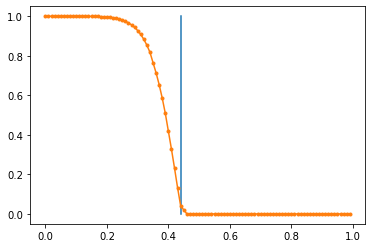

In [11]:
L=5
pyplot.plot([0.5*np.log(np.sqrt(2)+1)]*2,[0,1])
pyplot.plot(np.arange(0,1,0.01),(lam1s**L-lam2s**L-lam3s**L+lam4s**L)/(lam1s**L+lam2s**L+lam3s**L+lam4s**L),'.-')


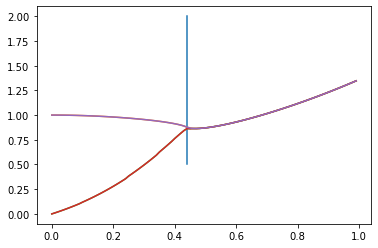

In [12]:
pyplot.plot([0.5*np.log(np.sqrt(2)+1)]*2,[0.5,2])
pyplot.plot(np.arange(0.,1,0.01),lam1s)
#pyplot.plot(np.arange(0.4,0.5,0.002),lam2s)
#pyplot.plot(np.arange(0.4,0.5,0.002),lam3s)
pyplot.plot(np.arange(0.,1,0.01),lam2s)
pyplot.plot(np.arange(0.,1,0.01),lam3s)
#pyplot.plot(np.arange(0.4,0.5,0.002),lam2s)
#pyplot.plot(np.arange(0.4,0.5,0.002),lam3s)
pyplot.plot(np.arange(0.,1,0.01),lam4s)

Text(0, 0.5, '$\\chi$')

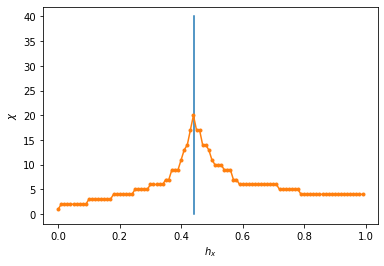

In [13]:
pyplot.plot([0.5*np.log(np.sqrt(2)+1)]*2,[0,40])
pyplot.plot(np.arange(0,1,0.01),dims,'.-')
pyplot.xlabel('$h_x$')
pyplot.ylabel('$\chi$')

$h_z \neq 0, h_x\neq 0$

In [2]:
eigs=[]
lam1s=[]
lam2s=[]
lam3s=[]
lam4s=[]
dims=[]
X = np.array([[0,1],[1,0]])
Z = np.array([[1,0],[0,-1]])
for h in np.arange(0.,1,0.01):   
    
    h1 = h
    h2 = 0.5
    
    B = np.zeros([1,1,4])
    B[0,0] =(linalg.expm(h*Z)).reshape([4,])
    #B[0,0] =(np.array([[0,0],[0,1]])).reshape([4,])
    #B[0,0] =(np.random.rand(2,2)).reshape([4,])
    MPS = iMPS.iMPS()
    MPS.construct_from_tensor_list([B])
    MPS.svd_threshold =1e-10
        

    trans = funcs.single_trans(h1=h1,h2=h2,u1="I",u2="I")
    
    MPO = iMPS.iMPO()
    MPO.construct_from_tensor_list([trans])
    MPS_power = iMPS.MPS_power_method(MPS,MPO,30)
    MPS_power.update(0,400)
    #print(MPS.chi[0])
    eigs.append(MPS_power.E_history[-1])


    
    T1 = funcs.single_T(h1,h2)
    MPO3 = iMPS.iMPO()
    MPO3.construct_from_tensor_list([T1])
    
    
    strap1 = iMPS.strap(MPS,MPO3,MPS)
    lam1= strap1.calculate_eig()
    
    T2 = funcs.single_T(h1,h2,"I","X")
    MPO4 = iMPS.iMPO()
    MPO4.construct_from_tensor_list([T2])
    
    
    strap2 = iMPS.strap(MPS,MPO4,MPS)
    lam2 = strap2.calculate_eig()
    
    
    T3 = funcs.single_T(h1,h2,"X","I")
    MPO4 = iMPS.iMPO()
    MPO4.construct_from_tensor_list([T3])
    
    
    strap3 = iMPS.strap(MPS,MPO4,MPS)
    lam3 = strap3.calculate_eig()
    
    T3 = funcs.single_T(h1,h2,"X","X")
    MPO4 = iMPS.iMPO()
    MPO4.construct_from_tensor_list([T3])
    
    
    strap4 = iMPS.strap(MPS,MPO4,MPS)
    lam4 = strap4.calculate_eig()
    
    dims.append(MPS.chi[0])
   
    lam1s.append(lam1)
    lam2s.append(lam2)
    lam3s.append(lam3)
    lam4s.append(lam4)
    
lam1s = np.real(lam1s)
lam2s = np.real(lam2s)
lam3s = np.real(lam3s)
lam4s = np.real(lam4s)

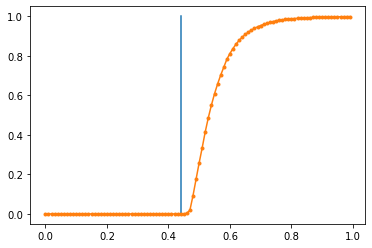

In [3]:
L=5
pyplot.plot([0.5*np.log(np.sqrt(2)+1)]*2,[0,1])
pyplot.plot(np.arange(0,1,0.01),(lam1s**L+lam2s**L-lam3s**L-lam4s**L)/(lam1s**L+lam2s**L+lam3s**L+lam4s**L),'.-')


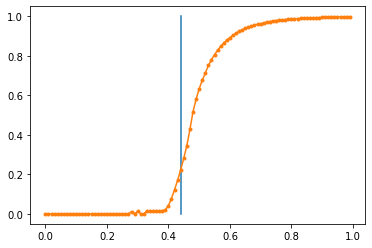

In [5]:
L=5
pyplot.plot([0.5*np.log(np.sqrt(2)+1)]*2,[0,1])
pyplot.plot(np.arange(0,1,0.01),(lam1s**L-lam2s**L-lam3s**L+lam4s**L)/(lam1s**L+lam2s**L+lam3s**L+lam4s**L),'.-')


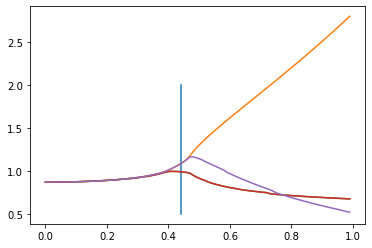

In [6]:
pyplot.plot([0.5*np.log(np.sqrt(2)+1)]*2,[0.5,2])
pyplot.plot(np.arange(0.,1,0.01),lam1s)
#pyplot.plot(np.arange(0.4,0.5,0.002),lam2s)
#pyplot.plot(np.arange(0.4,0.5,0.002),lam3s)
pyplot.plot(np.arange(0.,1,0.01),lam2s)
pyplot.plot(np.arange(0.,1,0.01),lam3s)
#pyplot.plot(np.arange(0.4,0.5,0.002),lam2s)
#pyplot.plot(np.arange(0.4,0.5,0.002),lam3s)
pyplot.plot(np.arange(0.,1,0.01),lam4s)

Text(0, 0.5, '$\\chi$')

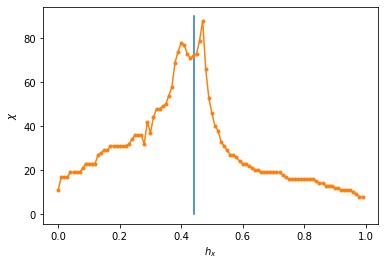

In [8]:
pyplot.plot([0.5*np.log(np.sqrt(2)+1)]*2,[0,90])
pyplot.plot(np.arange(0,1,0.01),dims,'.-')
pyplot.xlabel('$h_x$')
pyplot.ylabel('$\chi$')